## NOTEBOOK 06

In this notebook we are going to use the Metropolis and the Gibbs sampling algorithm in order to simulate a 1D Ising system and calculate some of its thermodynamic properties, namely $U(N,T)$, $C(N,T)$, $\chi(N,T)$ and $M(N,T,h)$, as a function of the temperature

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### EXERCISE 06.1

The first thing we do is an "equilibration run" with both the sampling methods. This means that we start with a $T= \infty$ configuration and then we flip the spins according to the sampling method we had chosen, making the system converge to the temperature we decided the system to have. The behaviour of one of the physical quantities we have to measure, in this case the energy, during the equilibration run is shown in the following

N.B We will assume units such that $\mu_B=1$ and $k_B=1$

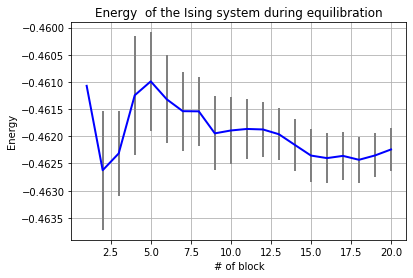

In [2]:
example=np.loadtxt("example_run/output.ene.0")

x=[]
y=[]
y_err=[]

for i in range(len(example)):
    x.append(int(example[i][0]))
    y.append(example[i][2])
    y_err.append(example[i][3])
    
plt.errorbar(x,y,yerr=y_err,color='b',lw=2,ecolor='gray')
plt.grid(True)
plt.xlabel("# of block")
plt.ylabel("Energy")
plt.title("Energy  of the Ising system during equilibration")

plt.show()
plt.close()

As can be seen, the equilibration run is made up of 20 blocks of 10000 steps each. This leads to the need of only one run to equilibrate the system. For the metropolis algorithm, when the flip acceptance is low, namely when the temperature $T \in [0.5,0.9]$ we also augmented the number of steps for each block from 10000 to 30000, in order to mantain  on average the same number of total flips.

1) **Metropolis algorithm**


Now we can show the results obtained with the Metropolis algorithm. We split the temperature interval $[0.5,2]$ into 15 descrete values. For each temperature we equilibrated the system and then measured the different physical quantities. The results are shown below

N.B. The magnetization per spin is considered with $h=0.02$, whereas for the other quantities $h=0$

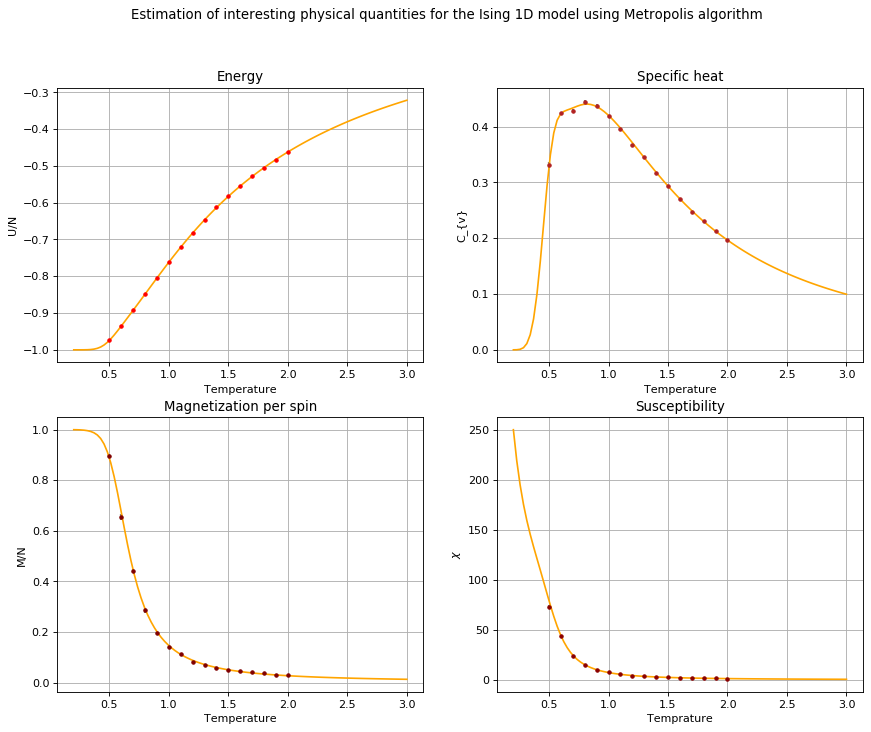

In [4]:
fig, [[ax1, ax2],[ax3, ax4]] = plt.subplots(2, 2,figsize=(13,10),dpi=80)

#Prepare the data to plot

m_e=open('results/metro_ene.dat','r').read().split('\n')
m_e=[x.split(',') for x in m_e]

m_c=open('results/metro_heat.dat','r').read().split('\n')
m_c=[x.split(',') for x in m_c]

m_m=open('results/metro_mag.dat','r').read().split('\n')
m_m=[x.split(',') for x in m_m]

m_x=open('results/metro_chi.dat','r').read().split('\n')
m_x=[x.split(',') for x in m_x]

x1=np.zeros(len(m_e)-1)
y1=np.zeros(len(m_e)-1)
y1_err=np.zeros(len(m_e)-1)

x2=np.zeros(len(m_c)-1)
y2=np.zeros(len(m_c)-1)
y2_err=np.zeros(len(m_c)-1)

x3=np.zeros(len(m_m)-1)
y3=np.zeros(len(m_m)-1)
y3_err=np.zeros(len(m_m)-1)

x4=np.zeros(len(m_x)-1)
y4=np.zeros(len(m_x)-1)
y4_err=np.zeros(len(m_x)-1)


for i in range(len(m_e)-1):
    x1[i]=m_e[i][0]
    y1[i]=m_e[i][1]
    y1_err[i]=m_e[i][2]
    
    x2[i]=m_c[i][0]
    y2[i]=m_c[i][1]
    y2_err[i]=m_c[i][2]
    
    x3[i]=m_m[i][0]
    y3[i]=m_m[i][1]
    y3_err[i]=m_m[i][2]
    
    x4[i]=m_x[i][0]
    y4[i]=m_x[i][1]
    y4_err[i]=m_x[i][2]

# Import the theoretical data to compare

points=100
T = np.linspace(0.2,3.0,num=points)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
#Energy
e = -J*( th + ch*thN )/( 1 + thN )
#Specific heat
heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)
#Magnetization per spin

h=0.02 #external field
b = 1/T

l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)
#Susceptibility

X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)


# Plot all the data

ax1.errorbar(x1,y1,yerr=y1_err,marker='.',linestyle='none',lw=2,ecolor='gray',color='r')
ax1.plot(T,e,color="orange")
ax1.set_title('Energy')
ax1.set(xlabel='Temperature', ylabel='U/N')

ax2.errorbar(x2,y2,yerr=y2_err,color='firebrick',marker='.',linestyle='none',lw=2,ecolor='gray')
ax2.plot(T,heat,color="orange")
ax2.set_title('Specific heat')
ax2.set(xlabel='Temperature', ylabel='C_{v}')

ax3.errorbar(x3,y3,yerr=y3_err, color='maroon',marker='.',linestyle='none',lw=2,ecolor='gray')
ax3.plot(T,M,color="orange")
ax3.set_title('Magnetization per spin')
ax3.set(xlabel='Temperature', ylabel='M/N')

ax4.errorbar(x4,y4,yerr=y4_err, color='darkred',marker='.',linestyle='none',lw=2,ecolor='gray')
ax4.plot(T,X,color="orange")
ax4.set_title('Susceptibility')
ax4.set(xlabel='Temprature', ylabel='$\chi$')

fig.suptitle("Estimation of interesting physical quantities for the Ising 1D model using Metropolis algorithm")
ax1.grid(True)
ax2.grid(True)
ax3.grid(True)
ax4.grid(True)
plt.show()
plt.close()

As we can see, there's a good agreement between the theoretical curve and the point generated with the metropolis algorithm

2) **Gibbs algorithm**

Now we repeat the experiment using the Gibbs algorithm instead of Metropolis. Everything apart from the algorithm remains unchanged.

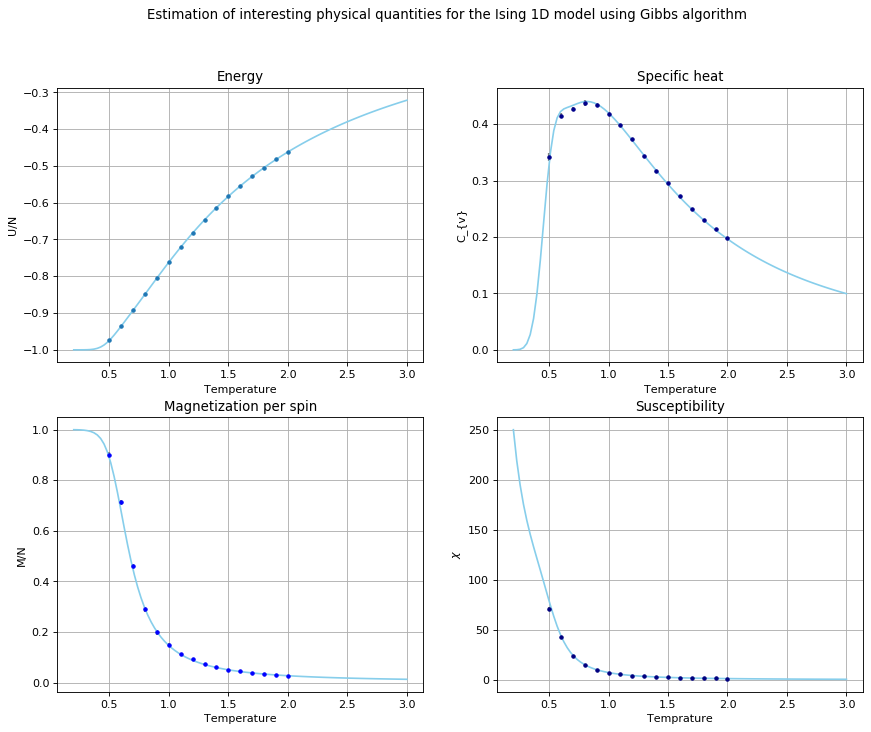

In [6]:
fig, [[ax1, ax2],[ax3, ax4]] = plt.subplots(2, 2,figsize=(13,10),dpi=80)

#Prepare the data to plot

g_e=open('results/gibbs_ene.dat','r').read().split('\n')
g_e=[x.split(',') for x in g_e]

g_c=open('results/gibbs_heat.dat','r').read().split('\n')
g_c=[x.split(',') for x in g_c]

g_m=open('results/gibbs_mag.dat','r').read().split('\n')
g_m=[x.split(',') for x in g_m]

g_x=open('results/gibbs_chi.dat','r').read().split('\n')
g_x=[x.split(',') for x in g_x]

x1=np.zeros(len(g_e)-1)
y1=np.zeros(len(g_e)-1)
y1_err=np.zeros(len(g_e)-1)

x2=np.zeros(len(g_c)-1)
y2=np.zeros(len(g_c)-1)
y2_err=np.zeros(len(g_c)-1)

x3=np.zeros(len(g_m)-1)
y3=np.zeros(len(g_m)-1)
y3_err=np.zeros(len(g_m)-1)

x4=np.zeros(len(g_x)-1)
y4=np.zeros(len(g_x)-1)
y4_err=np.zeros(len(g_x)-1)


for i in range(len(g_e)-1):
    x1[i]=g_e[i][0]
    y1[i]=g_e[i][1]
    y1_err[i]=g_e[i][2]
    
    x2[i]=g_c[i][0]
    y2[i]=g_c[i][1]
    y2_err[i]=g_c[i][2]
    
    x3[i]=g_m[i][0]
    y3[i]=g_m[i][1]
    y3_err[i]=g_m[i][2]
    
    x4[i]=g_x[i][0]
    y4[i]=g_x[i][1]
    y4_err[i]=g_x[i][2]

# Import the theoretical data to compare

points=100
T = np.linspace(0.2,3.0,num=points)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
#Energy
e = -J*( th + ch*thN )/( 1 + thN )
#Specific heat
heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)
#Magnetization per spin

h=0.02 #external field
b = 1/T

l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)
#Susceptibility

X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)


# Plot all the data

ax1.errorbar(x1,y1,yerr=y1_err,marker='.',linestyle='none',lw=2,ecolor='gray')
ax1.plot(T,e,color="skyblue")
ax1.set_title('Energy')
ax1.set(xlabel='Temperature', ylabel='U/N')

ax2.errorbar(x2,y2,yerr=y2_err,color='darkblue',marker='.',linestyle='none',lw=2,ecolor='gray')
ax2.plot(T,heat,color="skyblue")
ax2.set_title('Specific heat')
ax2.set(xlabel='Temperature', ylabel='C_{v}')

ax3.errorbar(x3,y3,yerr=y3_err, color='blue',marker='.',linestyle='none',lw=2,ecolor='gray')
ax3.plot(T,M,color="skyblue")
ax3.set_title('Magnetization per spin')
ax3.set(xlabel='Temperature', ylabel='M/N')

ax4.errorbar(x4,y4,yerr=y4_err, color='navy',marker='.',linestyle='none',lw=2,ecolor='gray')
ax4.plot(T,X,color="skyblue")
ax4.set_title('Susceptibility')
ax4.set(xlabel='Temprature', ylabel='$\chi$')

fig.suptitle("Estimation of interesting physical quantities for the Ising 1D model using Gibbs algorithm")
ax1.grid(True)
ax2.grid(True)
ax3.grid(True)
ax4.grid(True)
plt.show()
plt.close()

Also eith tre Gibbs sampling data the agreement with the theoretical curve is good.